In [1]:
if "running_all" not in globals():
    from ipywidgets import widgets
    matrices = ["bcsstk18", "cbuckle", "ct20stif", "raefsky4", "vanbody"]
    b = widgets.Button(description="Run over all matrices", button_style="success")
    output = widgets.Output()

    display(b, output)

    def run_over_all_matrices(button):
        global running_all
        global matrix
        running_all = True
        with output:
            for matrix in matrices:
                print(f"Running {matrix}...")
                %run ./iteration_2norm_corrs.ipynb # will output at this cell rather than later
            print("Finished!")
    b.on_click(run_over_all_matrices)

Button(button_style='success', description='Run over all matrices', style=ButtonStyle())

Output()

In [2]:
if "running_all" not in globals():
    matrix = "thermal1"  # manually set to run over one matrix
matrix

'thermal1'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
test_data_sizes = {
    "bcsstk18": 1000,
    "cbuckle": 1000,
    "ct20stif": 1000,
    "raefsky4": 1000,
    "vanbody": 100,
    "Pres_Poisson": 1000,
    "thermal1": 1000,
}

df = pd.read_csv(f"data/{matrix}_{test_data_sizes[matrix]}.csv")
df.head()

,mat_name,errorfree_iterations,tol,maxiter,error_pos,error_iter,solve_iterations,final_relres,did_converge,realtime_s,pos_2norm,n_rows,slowdown
0,thermal1.mat,65,0.000001,6500,2194,2,79,9.554594e-07,True,0.448625,4.347664,82654,1.215385
1,thermal1.mat,65,0.000001,6500,62138,19,108,7.568392e-07,True,0.490932,4.728087,82654,1.661538
2,thermal1.mat,65,0.000001,6500,237,64,70,5.363607e-07,True,0.356246,4.185611,82654,1.076923
3,thermal1.mat,65,0.000001,6500,51492,42,68,8.291581e-07,True,0.343172,3.840535,82654,1.046154
4,thermal1.mat,65,0.000001,6500,76066,35,71,9.238926e-07,True,0.342662,4.687151,82654,1.092308


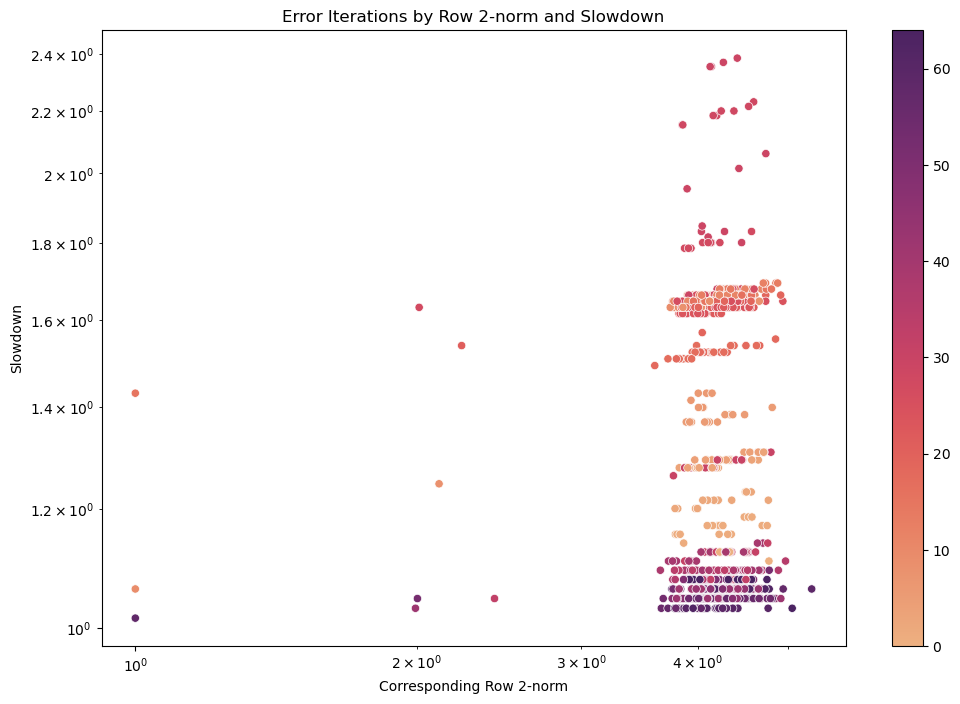

In [5]:
plt.gcf().set_size_inches(12, 8)
plt.gcf().set_dpi(100)

ax = sns.scatterplot(df, x="pos_2norm", y="slowdown", hue="error_iter", palette="flare", legend=False)
norm = plt.Normalize(df['error_iter'].min(), df['error_iter'].max())
sm = plt.cm.ScalarMappable(cmap="flare", norm=norm)
sm.set_array([])
ax.figure.colorbar(sm, ax=plt.gca())

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Corresponding Row 2-norm")
plt.ylabel("Slowdown")
plt.title("Error Iterations by Row 2-norm and Slowdown")
plt.savefig(f"./figures/{matrix}/iter_by_r2n_slowdown.png")
plt.show()

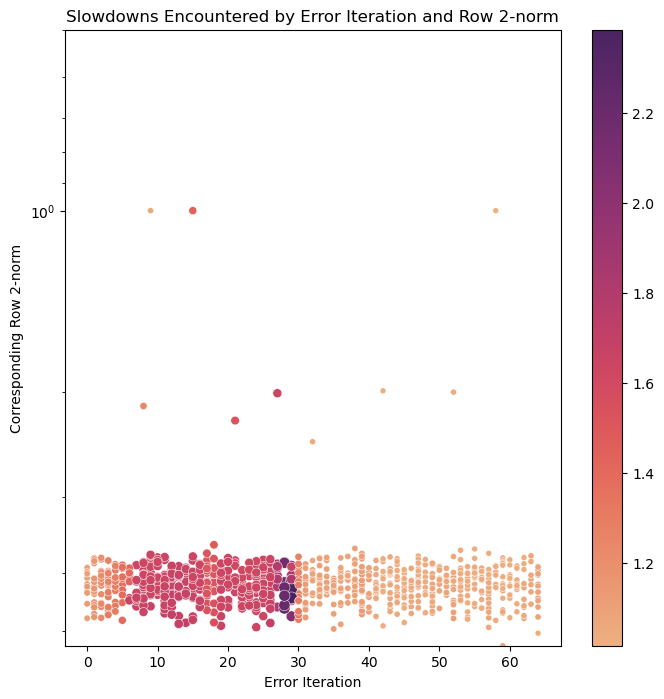

In [6]:
plt.gcf().set_size_inches(8, 8)
plt.gcf().set_dpi(100)

ax = sns.scatterplot(df, x="error_iter", y="pos_2norm", 
                     size="slowdown", hue="slowdown", legend=False, palette="flare")
norm = plt.Normalize(df['slowdown'].min(), df['slowdown'].max())
sm = plt.cm.ScalarMappable(cmap="flare", norm=norm)
sm.set_array([])
ax.figure.colorbar(sm, ax=plt.gca())

plt.yscale("log")
plt.ylim(0.5, df["pos_2norm"].max())
ax.invert_yaxis()
plt.xlabel("Error Iteration")
plt.ylabel("Corresponding Row 2-norm")
plt.title("Slowdowns Encountered by Error Iteration and Row 2-norm")
plt.savefig(f"./figures/{matrix}/slowdown_by_iter_r2n.png")
plt.show()